KNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

Reading data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo.csv


In [ ]:
zoo = pd.read_csv("Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


Checking for null values

In [ ]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
zoo.legs.value_counts()

4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64

Using  the given labels in the data as label encoder for legs column

Checking for duplicated values

In [ ]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [ ]:
zoo_mod = zoo.copy()


In [ ]:
zoo=zoo.iloc[:,1:]

In [ ]:
x=zoo.iloc[:,:-1]

In [ ]:
y=zoo.iloc[:,-1]

Using StandardScaler to scale the data

In [ ]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [ ]:
x1=x

In [ ]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

Building a model with k=15 and leave one out cross validation

In [ ]:
loo=LeaveOneOut()
model=KNeighborsClassifier(n_neighbors=15)
results=cross_val_score(model,x,y,cv=loo)

In [ ]:
results.mean()

0.8217821782178217

Doing grid search to find optimum K value

In [ ]:
n_neighbors = np.array(range(1,51))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}

In [ ]:
KNN = KNeighborsClassifier()
grid = GridSearchCV(estimator=KNN, param_grid=param_grid ,cv=loo)
grid.fit(x,y)

In [ ]:
print(grid.best_params_, grid.best_score_)

{'n_neighbors': 1} 0.9504950495049505


The optimum K value is 1 with an accuracy of 95.05%

Plotting the accuracy values against K

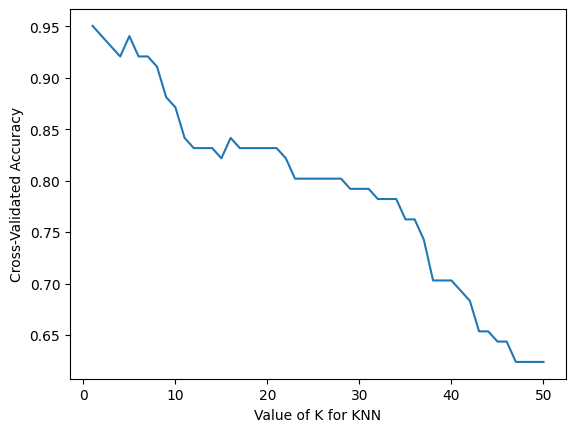

In [ ]:
k_range=range(1,51)
k_scores=[]
loo=LeaveOneOut()
for i in k_range:
    model=KNeighborsClassifier(n_neighbors=i)
    results=cross_val_score(model, x,y,cv=loo)
    k_scores.append(results.mean())

plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Using dummy columns for the legs column

In [ ]:
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
x=zoo.iloc[:,:-1]
y=zoo.iloc[:,-1]
x=pd.get_dummies(x,columns=['legs'])
ss=StandardScaler()
x=ss.fit_transform(x)
loo=LeaveOneOut()
model=KNeighborsClassifier(n_neighbors=15)
results=cross_val_score(model, x,y,cv=loo)
results.mean()

0.8316831683168316

Doing grid searh to find optimum K value

In [ ]:
n_neighbors = np.array(range(1,51))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}

In [ ]:
KNN = KNeighborsClassifier()
grid = GridSearchCV(estimator=KNN, param_grid=param_grid ,cv=loo)
grid.fit(x,y)

In [ ]:
print(grid.best_params_, grid.best_score_)

{'n_neighbors': 1} 0.9801980198019802


The optimum k value for K is 1 for which there is an accuracy of 98.02%

Plotting the graph for cross validated accuracy vs K

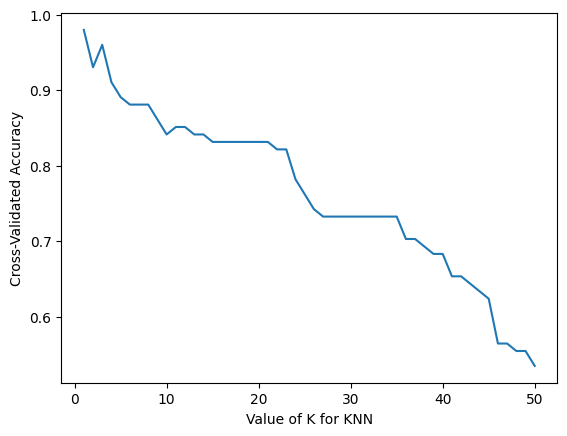

In [ ]:
k_range=range(1,51)
k_scores=[]
loo=LeaveOneOut()
for i in k_range:
    model=KNeighborsClassifier(n_neighbors=i)
    results=cross_val_score(model, x,y,cv=loo)
    k_scores.append(results.mean())

plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Using dummy variables give a better accuracy at K=1

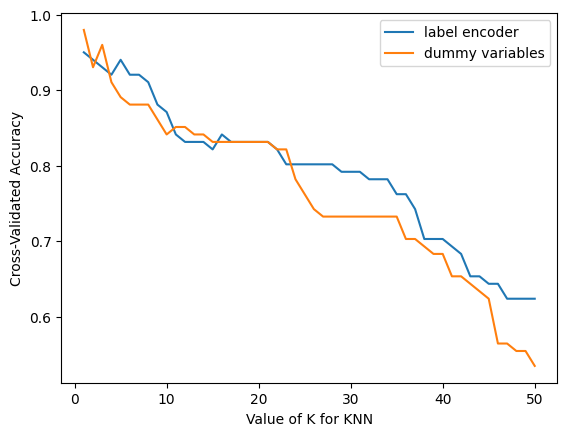

In [ ]:
k_range=range(1,51)
k_scores1=[]
k_scores2=[]
loo=LeaveOneOut()
for i in k_range:
    model=KNeighborsClassifier(n_neighbors=i)
    results=cross_val_score(model, x1,y,cv=loo)
    k_scores1.append(results.mean())
for i in k_range:
    model=KNeighborsClassifier(n_neighbors=i)
    results=cross_val_score(model, x,y,cv=loo)
    k_scores2.append(results.mean())


plt.plot(k_range,k_scores1)
plt.plot(k_range,k_scores2)
plt.legend(['label encoder','dummy variables'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()